/home/vscode/.cache/kagglehub/datasets/cashbowman/ai-generated-images-vs-real-images/versions/1/AiArtData/AiArtData/psychedelic-planet-surreal-landscape-water-painting-ai-generated-art_843679-2589.jpg


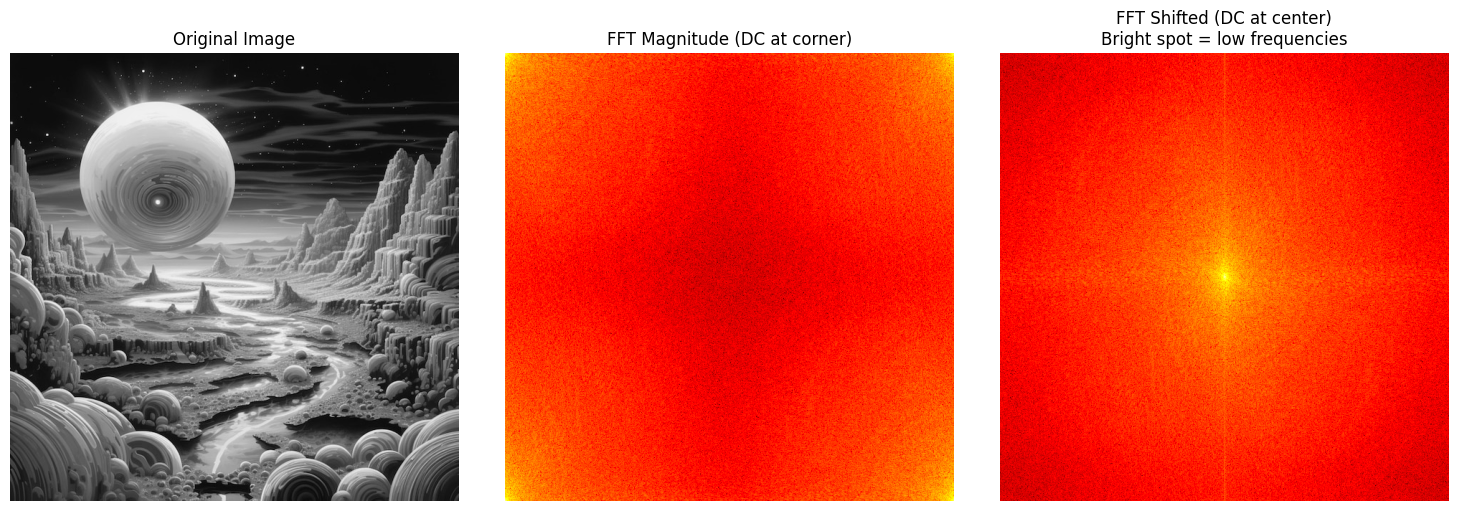

In [26]:
import numpy as np
from scipy.fft import fft2
import matplotlib.pyplot as plt
from PIL import Image

!find / -name "*.jpg" -print -quit 2>/dev/null

img = np.array(Image.open('/home/vscode/.cache/kagglehub/datasets/cashbowman/ai-generated-images-vs-real-images/versions/1/AiArtData/AiArtData/psychedelic-planet-surreal-landscape-water-painting-ai-generated-art_843679-2589.jpg').convert('L'))

# FFT
fft_coeffs = fft2(img)
fft_magnitude = np.abs(fft_coeffs)
fft_shifted = np.fft.fftshift(fft_magnitude)



fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(np.log(fft_magnitude + 1), cmap='hot')  # Log scale to see better
axes[1].set_title('FFT Magnitude (DC at corner)')
axes[1].axis('off')

axes[2].imshow(np.log(fft_shifted + 1), cmap='hot')
axes[2].set_title('FFT Shifted (DC at center)\nBright spot = low frequencies')
axes[2].axis('off')

plt.tight_layout()
plt.show()

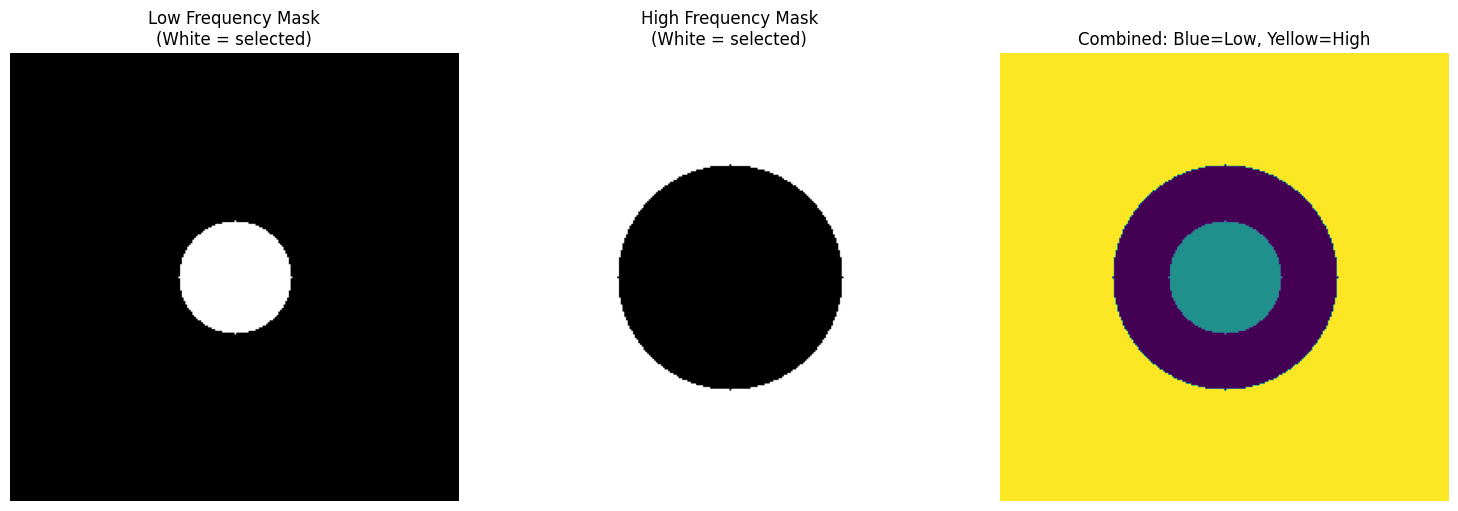

In [25]:
import numpy as np
import matplotlib.pyplot as plt

h, w = 256, 256
center_h, center_w = h // 2, w // 2

y, x = np.ogrid[:h, :w] # np.orgrid retuns a mesh, a coordinate grid for these purposes



# low frequency mask
radius_low = 32
mask_low = (x - center_w)**2 + (y - center_h)**2 <= radius_low**2

# high frequencies (radius > 64 pixels)
radius_high = 64
mask_high = (x - center_w)**2 + (y - center_h)**2 > radius_high**2


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(mask_low, cmap='gray')
axes[0].set_title('Low Frequency Mask\n(White = selected)')
axes[0].axis('off')

axes[1].imshow(mask_high, cmap='gray')
axes[1].set_title('High Frequency Mask\n(White = selected)')
axes[1].axis('off')


# Display them together 
mask_combined = np.zeros((h, w))
mask_combined[mask_low] = 1  # Low = 1
mask_combined[mask_high] = 2  # High = 2
axes[2].imshow(mask_combined, cmap='viridis')
axes[2].set_title('Combined: Blue=Low, Yellow=High')
axes[2].axis('off')

plt.tight_layout()
plt.show()